In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')

    There are 2 column that have been adjusted: budget_adj and revenue_adj. Those columns show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

    In this analysis I will use the adjusted one instead of non adjusted because I want to see how much the money that have been generated in the past

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#Changing data types
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#drop the unused column
df.drop(['id','imdb_id', 'homepage', 'tagline', 'overview', 'budget', 'revenue'],axis=1,inplace=True)

In [9]:
df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 

In [10]:
#Check if there is a duplicate data
df.duplicated().sum()

1

In [11]:
# drop the duplicates
df.drop_duplicates(inplace=True)
# confirm again 
df.duplicated().sum()

0

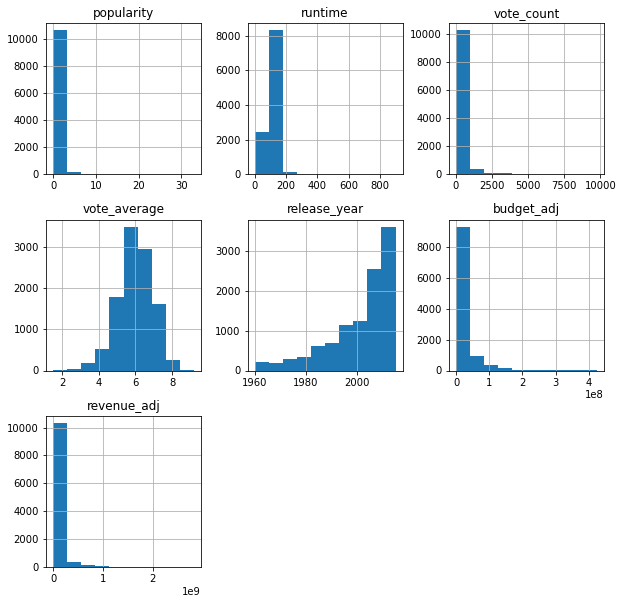

In [12]:
df.hist(figsize=(10,10));

## Budget and Revenue

    Divide the budget into 3 categories: Low, Medium, High

In [13]:
group_names = ['Low', 'Medium', 'High']
df['budget_binned'] = pd.qcut(df['budget_adj'], [0, .6, .9, 1], labels=group_names)
df[['budget_adj','budget_binned']].head(10)

,budget_adj,budget_binned
0,1.379999e+08,High
1,1.379999e+08,High
2,1.012000e+08,High
3,1.839999e+08,High
4,1.747999e+08,High
5,1.241999e+08,High
6,1.425999e+08,High
7,9.935996e+07,High
8,6.807997e+07,High
9,1.609999e+08,High


    We binned the budget data into 3 categories and there are 6519 rows of data data in Low , 3259 in Medium and 1084 in High budget_binned

In [14]:
df['budget_binned'].value_counts()

Low       6519
Medium    3259
High      1087
Name: budget_binned, dtype: int64

Text(0.5, 1.0, 'Budget categories')

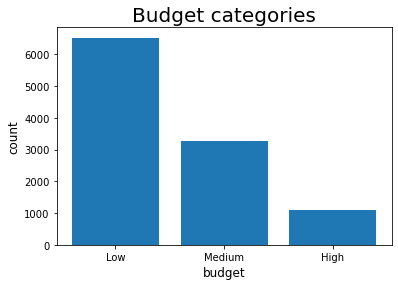

In [15]:
plt.bar(group_names, df['budget_binned'].value_counts())

plt.xlabel('budget',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Budget categories',fontsize=20)

    Calculate the average at each budget_binned categories

In [16]:
df.groupby('budget_binned')['budget_adj'].mean().astype(int)

budget_binned
Low          219952
Medium     23713290
High      103002866
Name: budget_adj, dtype: int32

In [17]:
avg_budget = df['budget_adj'].mean()
print('Average of budget used to produce a movie:', avg_budget)

Average of budget used to produce a movie: 17549894.037320614


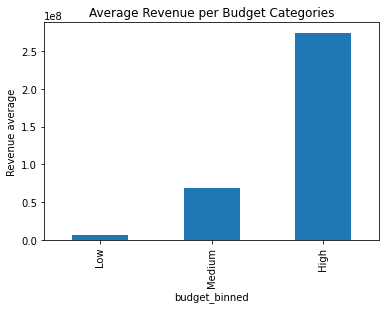

In [18]:
df.groupby('budget_binned').mean()['revenue_adj'].plot(kind='bar', title='Average Revenue per Budget Categories', ylabel='Revenue average');

    The average revenue per budget categories shows that budget has a correlation with revenue

## Movies with the highest profit

    Calculate the profit by subtracting revenue and budget

In [19]:
df['profit'] = df['revenue_adj']-df['budget_adj']

In [20]:
df.sort_values('profit', ascending=False).head(3)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_binned,profit
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,Medium,2.750137e+09
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,High,2.586237e+09
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,High,2.234714e+09


    Top 3 highest profit are Star Wars (1977), Avatar (2009) and Titanic (1997)

## Number of Movies Released Each Year

Text(0, 0.5, 'Number of Movies')

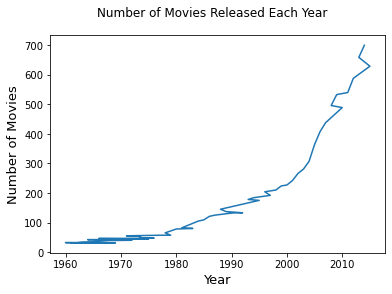

In [21]:
movie_count = df['release_year'].value_counts()

fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=12)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Movies',fontsize=13)

    The number of movies being released each year are exponentially increased from year to year. The numbers are started to increase at 1970s onwards. For now, we dont really sure why there is an exponentially growth of movie production. 

    Next, we plot the line chart of budget, revenue and profit of movies each year

Text(0, 0.5, 'budget of movies')

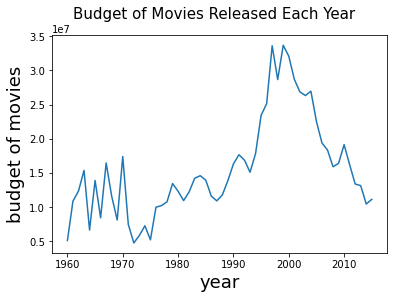

In [22]:
mean_budget = df.pivot_table('budget_adj', index='release_year', aggfunc='mean')
fig = plt.figure()
plt.plot(mean_budget)
fig.suptitle('Budget of Movies Released Each Year',fontsize=15)
plt.xlabel('year',fontsize=18)
plt.ylabel('budget of movies',fontsize=18)

The budget of movies released each year is started to increase at 1970 onwards. The peak of the budget being used in movie production is in late 1990s (around 1995-2000)

Text(0, 0.5, 'Revenue of movies')

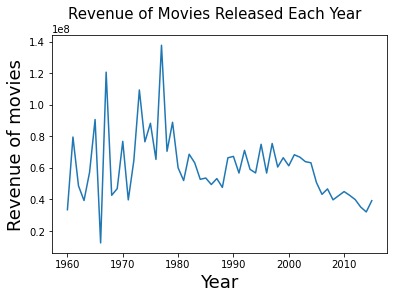

In [23]:
mean_revenue = df.pivot_table('revenue_adj', index='release_year', aggfunc='mean')
fig = plt.figure()
plt.plot(mean_revenue)
fig.suptitle('Revenue of Movies Released Each Year',fontsize=15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Revenue of movies',fontsize=18)

Text(0, 0.5, 'Profit of movies')

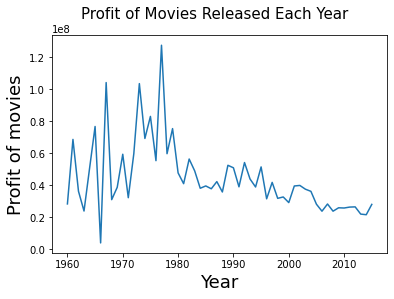

In [24]:
mean_profit = df.pivot_table('profit', index='release_year', aggfunc='mean')
fig = plt.figure()
plt.plot(mean_profit)
fig.suptitle('Profit of Movies Released Each Year',fontsize=15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Profit of movies',fontsize=18)

    We get a hint regarding why at 1970 onwards, there are tons of movies being released. At 1960 until 1970, there is a peak of revenue and profit obtained by movies, I assume that people at that time are started to watch movies, thus the revenue and profit from movies are started to increase, reaching to the peak, and it turned out that people/producers are started to make more movies.
    
    Remember, Star Wars (1977) is a movie with the highest profit. It might be that the movie industry start to flourish because of Star Wars 

## Movie Runtime

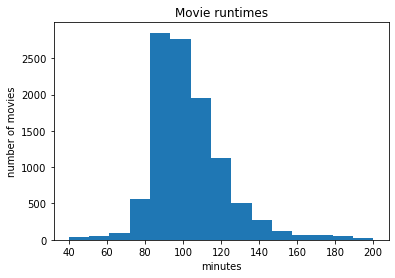

In [25]:
plt.hist(df['runtime'], range=(40,200), bins=15)
plt.title('Movie runtimes')
plt.xlabel('minutes')
plt.ylabel('number of movies')
plt.show()

## Popularity and Runtime

Text(0, 0.5, 'popularity')

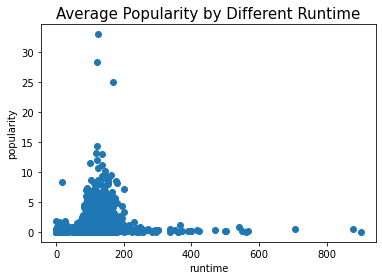

In [26]:
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=15)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

    The ideal runtime to get a higher popularity is in range of under 200 minutes

## Genres

In [27]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

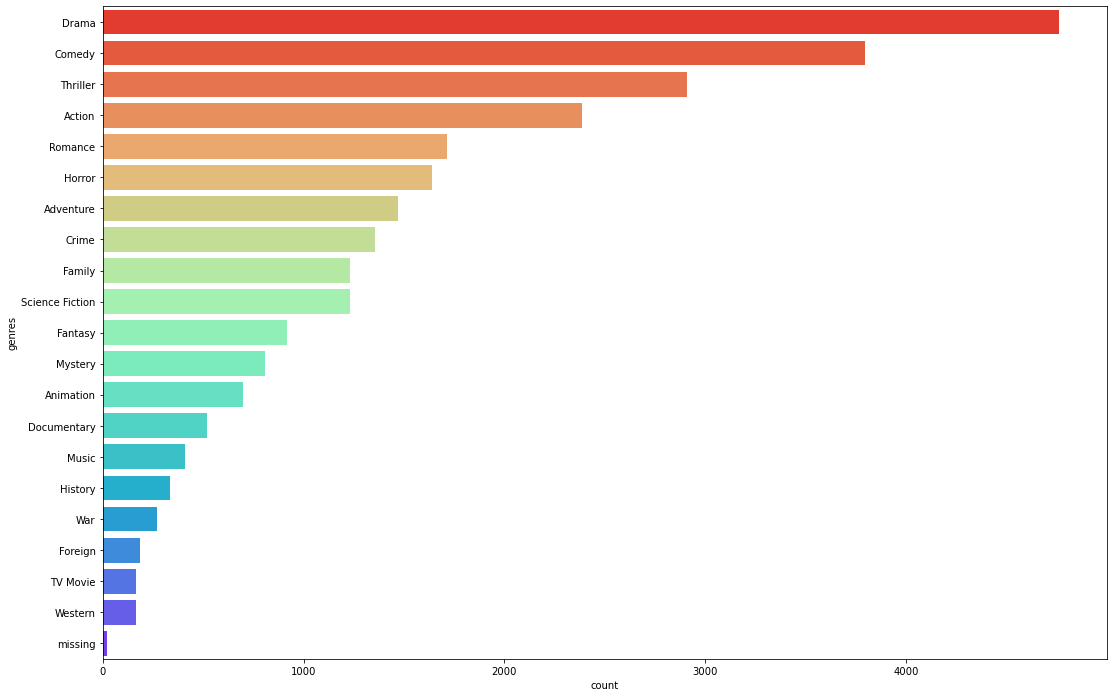

In [28]:
genre_count = extract_data('genres')

df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 

f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x="count", y="genres", data=df_genre_counts, color="c",palette="rainbow_r")
plt.show()

    The most widely used genres is drama, followed by comedy, thriller, action, romance, horror and adventure

In [29]:
genres_cat = df['genres'].str.cat(sep='|')
list_genres = pd.Series(genres_cat.split('|'))
list_genres = list(list_genres.unique())
list_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'missing',
 'Foreign']

In [30]:
#define a function to calculate the mean of each genres of 'column_name' (column_name example: revenue, budget, popularity)


def genres_column(genres, column_name):
    column_data = []
    
    for genre in genres:
        column_mean= df[df['genres'].str.contains(genre)][column_name].mean()
        column_data.append(column_mean)  
       
    df_column = pd.DataFrame({'nama_genre': list_genres, 
                 column_name: column_data})
    df_column = df_column.set_index('nama_genre')
    df_column.sort_values(column_name).plot(kind='bar', title='Mean {} of each genre'.format(column_name))

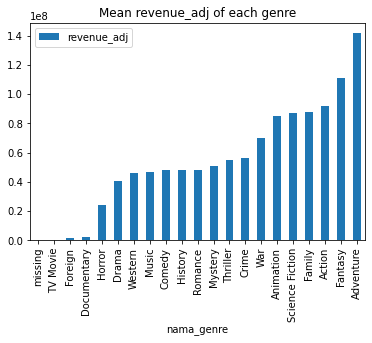

In [31]:
genres_column(list_genres, 'revenue_adj')

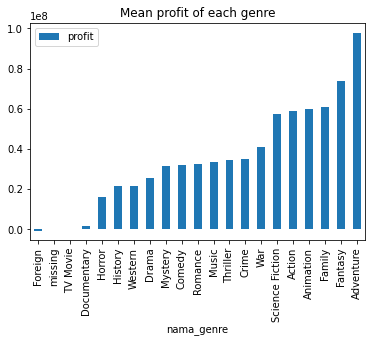

In [32]:
genres_column(list_genres, 'profit')

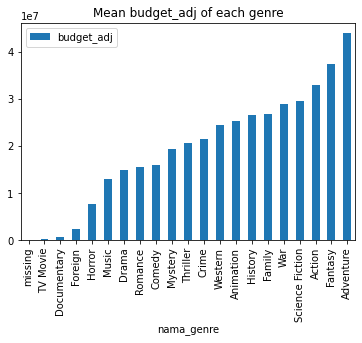

In [33]:
genres_column(list_genres, 'budget_adj')

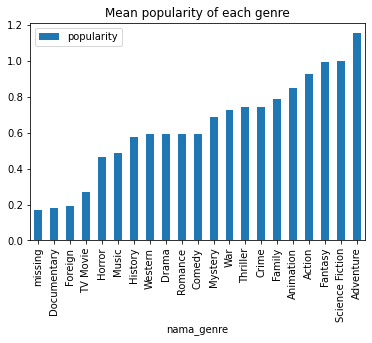

In [34]:
genres_column(list_genres, 'popularity')

    We calculate the mean of revenue, budget, popularity and profit of each genre. 
    - Genre with the highest mean of revenue   : Adventure, Fantasy,         Action,  Science Fiction, Animation, War,             Crime
    - Genre with the highest mean of profit    : Adventure, Fantasy,         Family,  Animation,       Action,    Science Fiction, War
    - Genre with the highest mean of budget    : Adventure, Fantasy,         Action,  Science Fiction, War,       Family,          History
    - Genre with the highest mean of popularity: Adventure, Science Fiction, Fantasy, Action,          Animation, Family,          Crime

## Top 100 highest profit

In [35]:
#make a new dataframe which contain a 100 rows with the highest profitable movies
df_high_100 = df.sort_values('profit', ascending=False).head(100)

In [36]:
data_100 = pd.Series(df_high_100['genres'].str.cat(sep = '|').split('|'))
count_data_100 = data_100.value_counts(ascending=False)

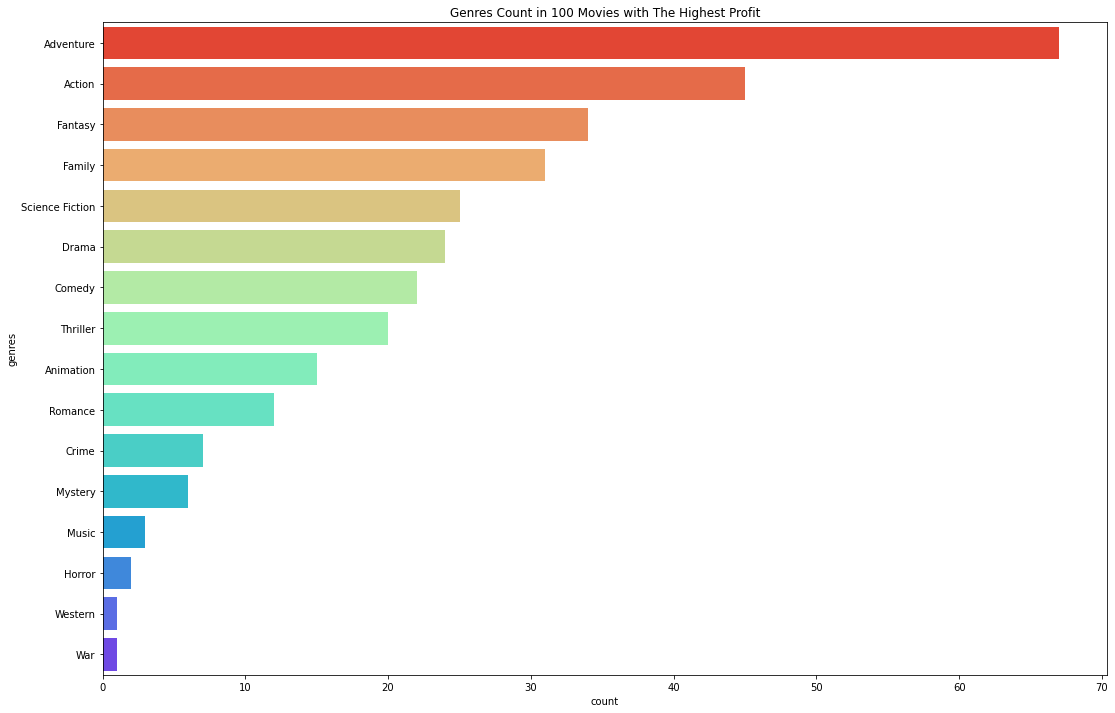

In [37]:
df_count_100 = pd.DataFrame({'genres': count_data_100.index, 'count': count_data_100.values }) 

f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x="count", y="genres", data=df_count_100, color="c",palette="rainbow_r")
plt.title('Genres Count in 100 Movies with The Highest Profit')
plt.show()

    The most genre used in this list:  Adventure, Action, Fantasy, Family, and Science Fiction

In [38]:
genres_cat_100 = df_high_100['genres'].str.cat(sep='|')
list_genres_100 = pd.Series(genres_cat_100.split('|'))
list_genres_100 = list(list_genres_100.unique())
list_genres_100

['Adventure',
 'Action',
 'Science Fiction',
 'Fantasy',
 'Drama',
 'Romance',
 'Thriller',
 'Horror',
 'Family',
 'Crime',
 'Mystery',
 'Animation',
 'Comedy',
 'Music',
 'War',
 'Western']

<AxesSubplot:title={'center':'Mean profit of each genre'}, xlabel='nama_genre'>

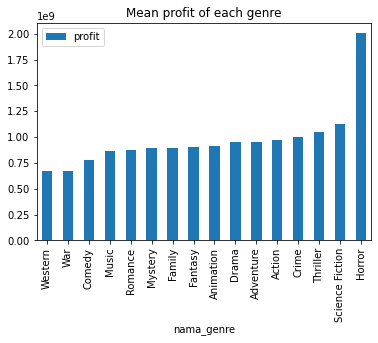

In [39]:
column_data = []
 
for genre in list_genres_100:
    column_mean= df_high_100[df_high_100['genres'].str.contains(genre)]['profit'].mean()
    column_data.append(column_mean)  
       
df_column = pd.DataFrame({'nama_genre': list_genres_100, 
                 'profit': column_data})
df_column = df_column.set_index('nama_genre')
df_column.sort_values('profit').plot(kind='bar', title='Mean {} of each genre'.format('profit'))

<AxesSubplot:title={'center':'Mean revenue_adj of each genre'}, xlabel='nama_genre'>

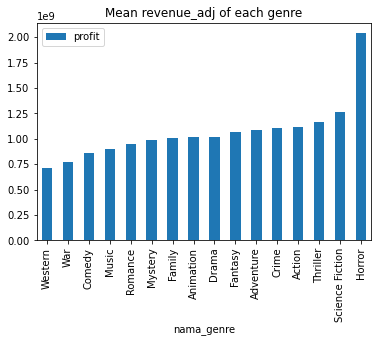

In [40]:
column_data = []
 
for genre in list_genres_100:
    column_mean= df_high_100[df_high_100['genres'].str.contains(genre)]['revenue_adj'].mean()
    column_data.append(column_mean)  
       
df_column = pd.DataFrame({'nama_genre': list_genres_100, 
                 'profit': column_data})
df_column = df_column.set_index('nama_genre')
df_column.sort_values('profit').plot(kind='bar', title='Mean {} of each genre'.format('revenue_adj'))

<AxesSubplot:title={'center':'Mean budget_adj of each genre'}, xlabel='nama_genre'>

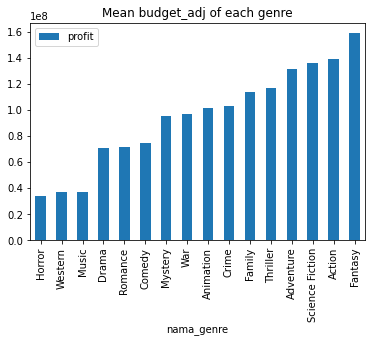

In [41]:
column_data = []
 
for genre in list_genres_100:
    column_mean= df_high_100[df_high_100['genres'].str.contains(genre)]['budget_adj'].mean()
    column_data.append(column_mean)  
       
df_column = pd.DataFrame({'nama_genre': list_genres_100, 
                 'profit': column_data})
df_column = df_column.set_index('nama_genre')
df_column.sort_values('profit').plot(kind='bar', title='Mean {} of each genre'.format('budget_adj'))

In [42]:
df_high_100['genres'].str.contains('Horror').value_counts()

False    98
True      2
Name: genres, dtype: int64

In [43]:
df_high_100[df_high_100['genres'].str.contains('Horror')]

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_binned,profit
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,Medium,2.128036e+09
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09,Medium,1.878643e+09


    The most genre appears in 100 Movies with the highest profit are adventure, action, fantasy, family, science fiction and drama.

    The most profitable genre is Horror. Horror genre has the highest average of profit (in 100 Movies) because it has the highest revenue but the lowest budget that used in movie production

## Which month with the highest numbers of released movies, the highest popularity, the highest revenue

In [44]:
df['release_month'] = df['release_date'].dt.month

In [45]:
df.groupby('release_month')['popularity'].mean()

release_month
1     0.460574
2     0.589931
3     0.642808
4     0.562475
5     0.749997
6     0.800755
7     0.747678
8     0.584363
9     0.564820
10    0.613168
11    0.755466
12    0.750784
Name: popularity, dtype: float64

<AxesSubplot:title={'center':'Number of Movies Released per Month'}, ylabel='Number of Movies'>

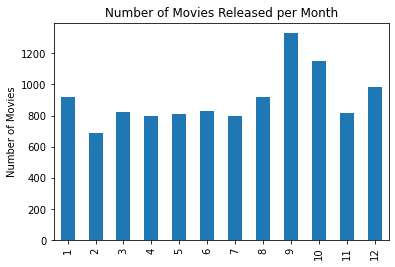

In [46]:
df['release_month'].value_counts().sort_index().plot(kind='bar', ylabel='Number of Movies', title='Number of Movies Released per Month')

<AxesSubplot:title={'center':'Average Popularity per Release Month'}, xlabel='release_month'>

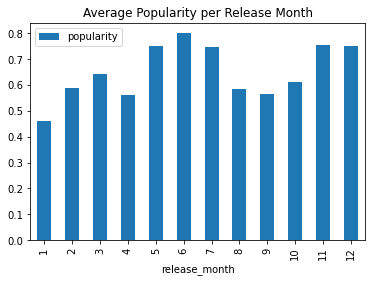

In [47]:
df.pivot_table(index='release_month', values='popularity', aggfunc='mean').plot(kind='bar', title='Average Popularity per Release Month')

<AxesSubplot:title={'center':'Average Revenue per Release Month'}, xlabel='release_month'>

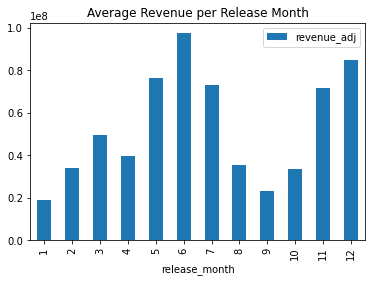

In [48]:
df.pivot_table(index='release_month', values='revenue_adj', aggfunc='mean').plot(kind='bar', title='Average Revenue per Release Month')

## Genres Count in Movies with High Popularity

In [49]:
df_popularity = df[df['popularity'] > 3]

In [50]:
df_popularity

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_binned,profit,release_month
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High,1.254446e+09,6
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High,2.101614e+08,5
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High,1.704191e+08,3
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High,1.718723e+09,12
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High,1.210949e+09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,3.264571,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,italo-american|cuba|vororte|melancholy|praise,200,Drama|Crime,Paramount Pictures|The Coppola Company,1974-12-20,2131,8.1,1974,5.748969e+07,2.102479e+08,Medium,1.527582e+08,12
9805,3.258151,One Flew Over the Cuckoo's Nest,Jack Nicholson|Louise Fletcher|Danny DeVito|Wi...,MiloÅ¡ Forman,individual|rebel|self-destruction|wheelchair|l...,133,Drama,Fantasy Films|Warner Bros.,1975-11-18,1612,8.0,1975,1.215546e+07,4.415726e+08,Medium,4.294172e+08,11
9849,3.170651,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,london|england|assassination|spy|casino,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08,Medium,4.216943e+08,10
9881,3.153791,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,secret organization|secret intelligence servic...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2064-09-17,602,7.0,1964,2.460594e+07,8.780804e+08,Medium,8.534745e+08,9


In [51]:
df_popularity['genres']

0       Action|Adventure|Science Fiction|Thriller
1       Action|Adventure|Science Fiction|Thriller
2              Adventure|Science Fiction|Thriller
3        Action|Adventure|Science Fiction|Fantasy
4                           Action|Crime|Thriller
                          ...                    
9758                                  Drama|Crime
9805                                        Drama
9849                    Adventure|Action|Thriller
9881                    Adventure|Action|Thriller
9923                        Science Fiction|Drama
Name: genres, Length: 256, dtype: object

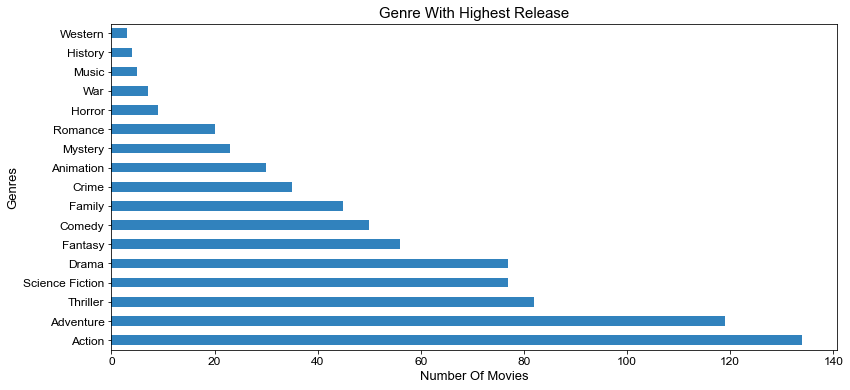

In [52]:
#make a function will will split the string and return the count of each genre.
def count_genres(x):
    #concatenate all the rows of the genres.
    data_plot = df_popularity[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genres('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")